# Parkinson’s Predictive Health Modeling

By Sebastian Lee

Dataset used : https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set/data


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the data

data_path = "/content/parkinsons.csv"
df = pd.read_csv(data_path,index_col='name')

# Exploratory data analysis

In [13]:
df.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Jitter: Variation in signal frequency
Shimmer: Variation in signal amplitude; Shimmer is a variation of amplitudes of consecutive periods. -> [Explanation](https://wiki.aalto.fi/display/ITSP/Jitter+and+shimmer#:~:text=Jitter%20and%20shimmer%20are%20acoustic,hoarseness%20in%20a%20speaker's%20voice.):


###Description of Variables
- "name": ID of each patient and recording sample number
- "MDVP":Fo(Hz): average vocal fundamental frequency, put simply it’s the pitch of the voice
- "MDVP:Fhi(Hz)": Maximum vocal fundamental frequency
- "MDVP:Flo(Hz)": Minimum vocal fundamental frequency
> Several measures of variation in fundamental frequency
- "MDVP:Jitter(%)" : MDVP jitter in percentage
- "MDVP:Jitter(Abs)" : 	MDVP absolute jitter in ms
- "MDVP:RAP" : MDVP relative amplitude perturbation(=deviation)
- "MDVP:PPQ" : MDVP five-point period perturbation quotient (= the average absolute difference between a period and the average of it and its four closest neighbors, divided by the average period, in [percentage](https://pdf.sciencedirectassets.com/280203/1-s2.0-S1877050916X00257/1-s2.0-S1877050916323237/main.pdf)
- "Jitter:DDP" : Average absolute difference of differences between jitter cycles
>Several measures of variation in amplitude -> mesure of frequency variation in the pitch of a vocal signal. It is the average difference between consecutive cycle lengths / average cycle length
- "MDVP - Shimmer" : MDVP local shimmer (= This is the average absolute difference between the amplitudes of consecutive periods, divided by the average amplitude. MDVP calls this parameter Shim, and gives 3.810% as a threshold for [pathology.](https://www.fon.hum.uva.nl/praat/manual/Voice_3__Shimmer.html))
- "MDVP - Shimmer(dB)" : MDVP local shimmer in dB (= average absolute base-10 logarithm of the difference between the amplitudes of consecutive periods, multiplied by 20)
- "Shimmer - APQ3" : Three-point amplitude perturbation quotient (= three-point Amplitude Perturbation Quotient, the average absolute difference between the amplitude of a period and the average of the amplitudes of its neighbours, divided by the average amplitude)
- "Shimmer - APQ5" : Five-point amplitude perturbation quotient (= five-point Amplitude Perturbation Quotient, the average absolute difference between the amplitude of a period and the average of the amplitudes of it and its four closest neighbours, divided by the average amplitude)
- "MDVP - APQ" : MDVP 11-point amplitude perturbation quotient (= the 11-point Amplitude Perturbation Quotient, the average absolute difference between the amplitude of a period and the average of the amplitudes of it and its ten closest neighbours, divided by the average amplitude)
- "Shimmer - DDA" : Average absolute differences between the amplitudes of consecutive periods (= average absolute difference between consecutive differences between the amplitudes of consecutive periods. This is Praat's original Get shimmer. The value is three times APQ3)
>Two measures of the ratio of noise to tonal components in the voice
- "NHR" : Noise-to-harmonics ratio (= the ratio between the energy in the non-harmonic components within the range 1500−4500 Hz and the harmonic components withing the range 70−4500 Hz)
- "HNR" : Harmonics-to-noise ratio (= measures the ratio between periodic and non-periodic components of a speech sound)
- "status" : The health status of the subject - Parkinson's = 1, healthy = 0
>Two nonlinear dynamical complexity measures
- "RPDE" :  Recurrence period density entropy measure (= "for characterising the extent to which a time series repeats the same sequence, and is therefore similar to linear autocorrelation and time delayed mutual information [...]The RPDE value $H_{norm}$ is a scalar in the range zero to one. For purely periodic signals, $H_{norm}$=0, whereas for purely i.i.d., uniform white noise, $H_{norm}$ approx 1.)
- "D2" : 	Correlation dimension
- "DFA" : Signal fractal scaling exponent of detrended fluctuation analysis (= method for determining the statistical self-affinity of a signal)
>Three nonlinear measures of fundamental frequency variation
- "spread1" :
- "spread2" : Frequency variation
- "PPE" : Pitch period entropy

### Class Frequency

In [16]:
# Plot the number of parkingson vs non-parkingson samples in the dataset

df['status'].value_counts(normalize = True)

,proportion
status,
1,0.753846
0,0.246154


The dataset is imbalanced. We have 3 times more diseased samples than healthy samples

### Features correlation


<Axes: >

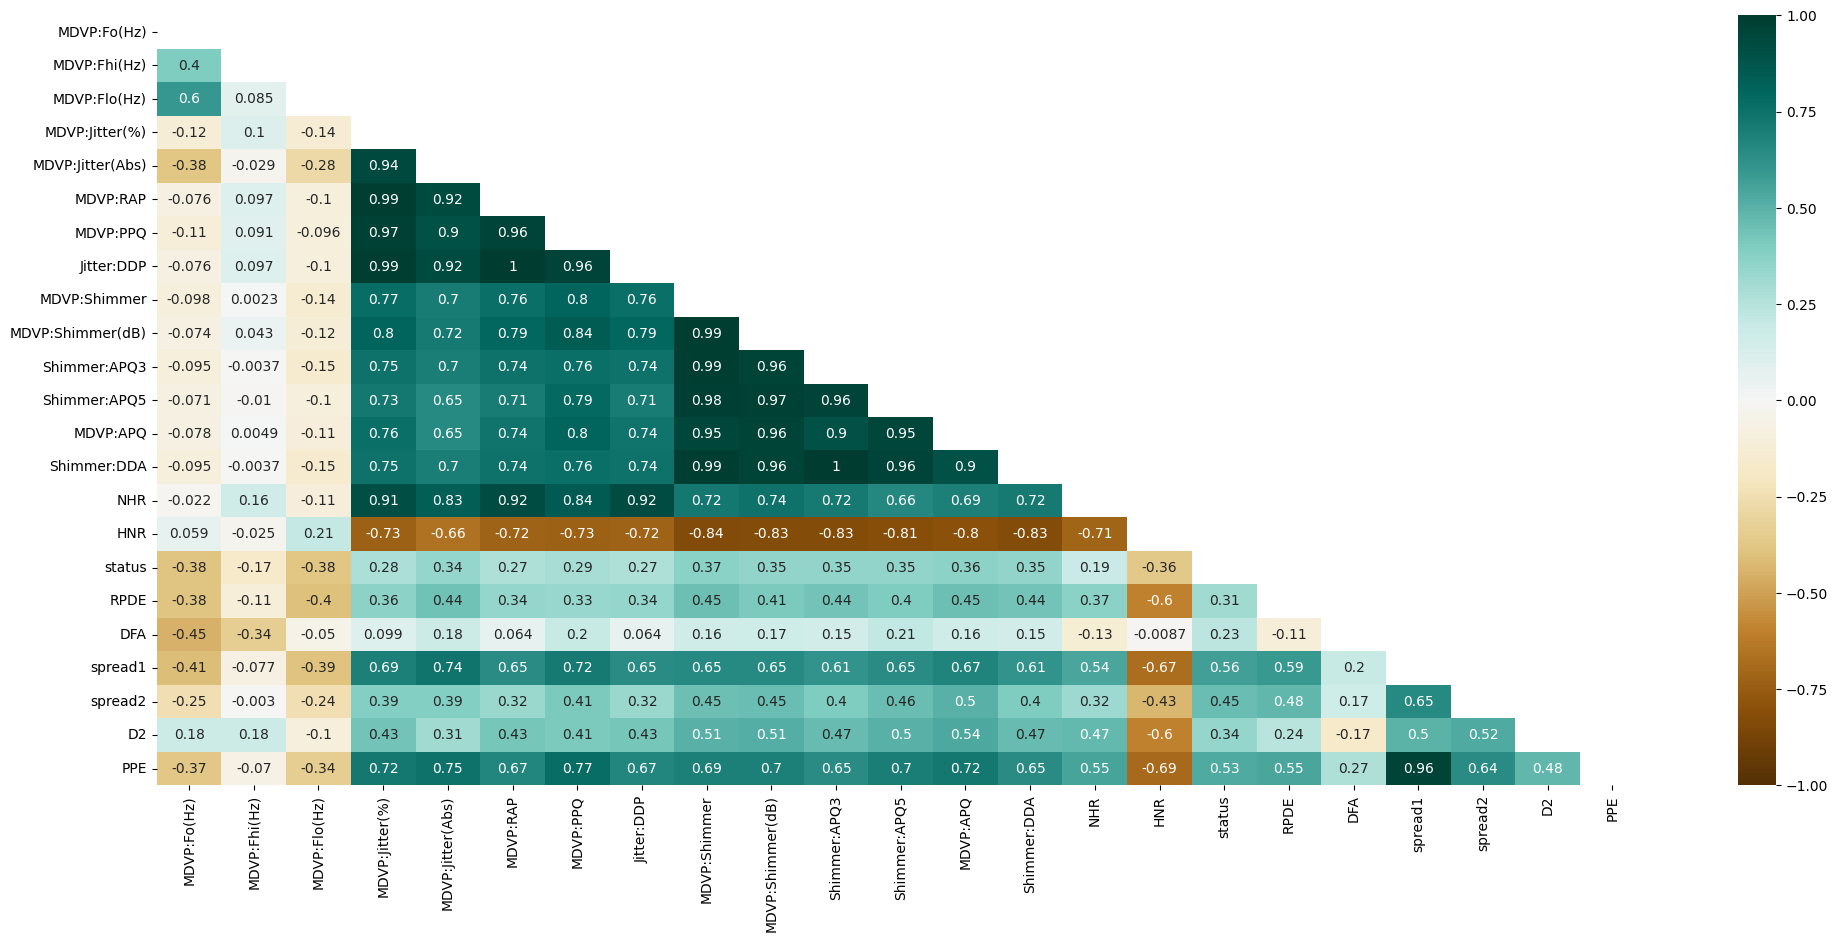

In [17]:
# Plot the correlation matrix

plt.figure(figsize=(24, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask,annot=True)

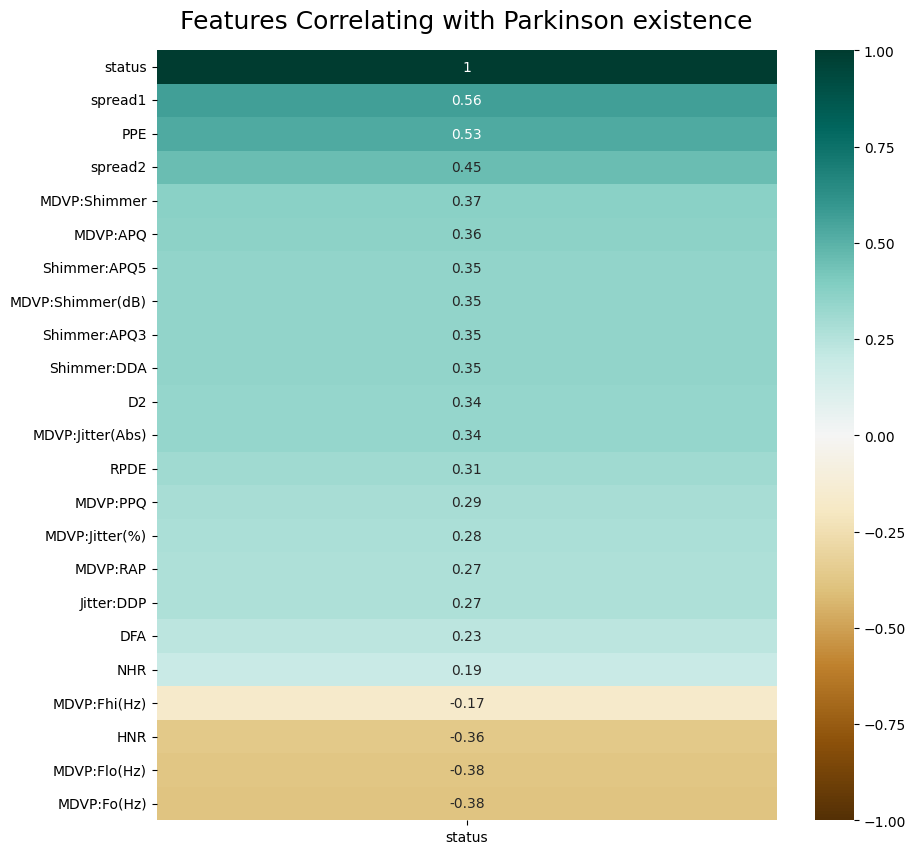

In [18]:
# Plot the features from most correlated to least correlated

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existence', fontdict={'fontsize':18}, pad=16);

### Features distribution

Skewness of MDVP:Fo(Hz): 0.5917374636540784
Kurtosis of MDVP:Fo(Hz): -0.6278981066788805


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


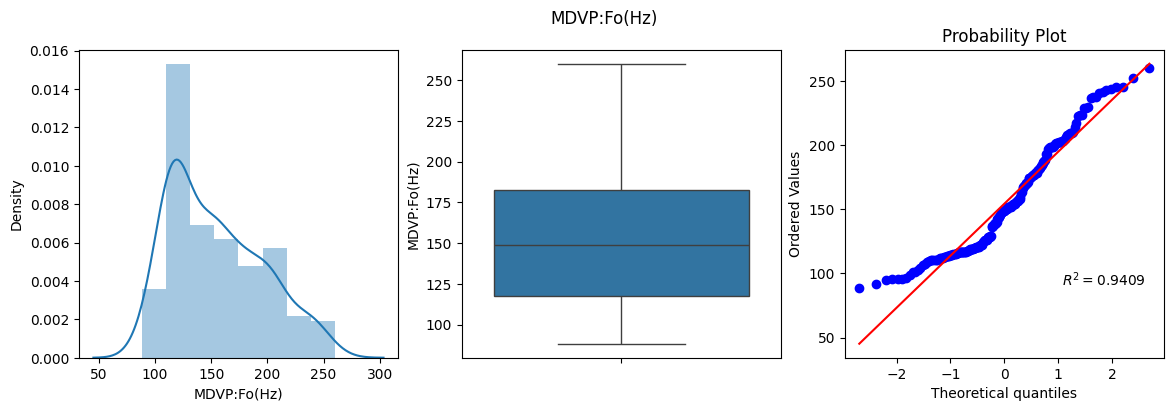

Skewness of MDVP:Fhi(Hz): 2.542145997588398
Kurtosis of MDVP:Fhi(Hz): 7.627241211631889


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


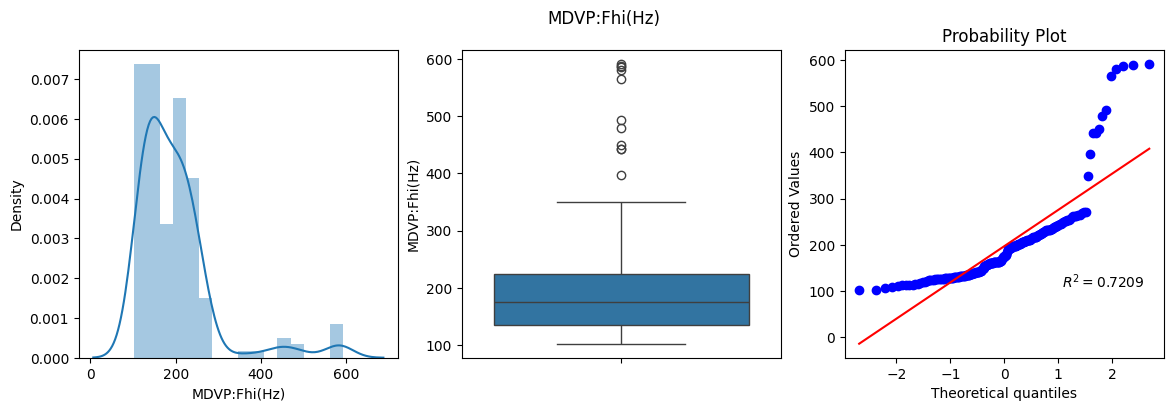

Skewness of MDVP:Flo(Hz): 1.217350448627808
Kurtosis of MDVP:Flo(Hz): 0.6546145211395396


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


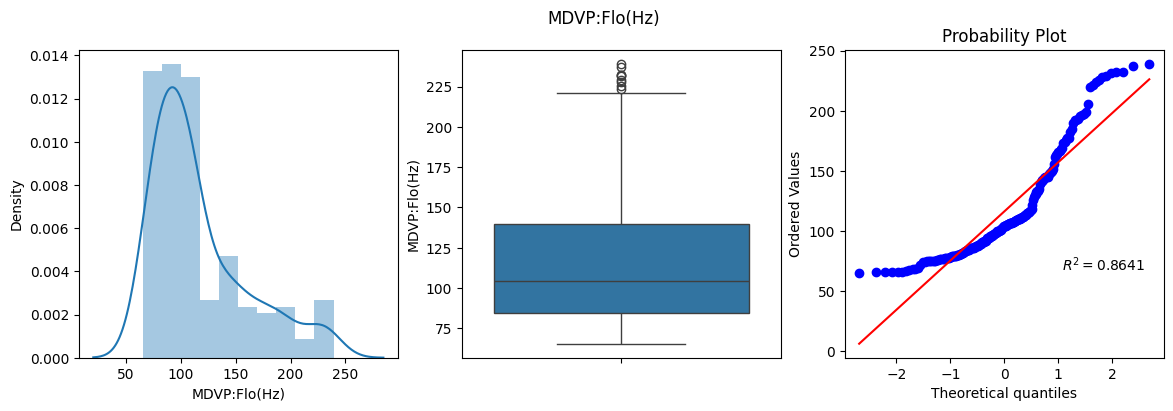

Skewness of MDVP:Jitter(%): 3.0849462014441826
Kurtosis of MDVP:Jitter(%): 12.030939276179508


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


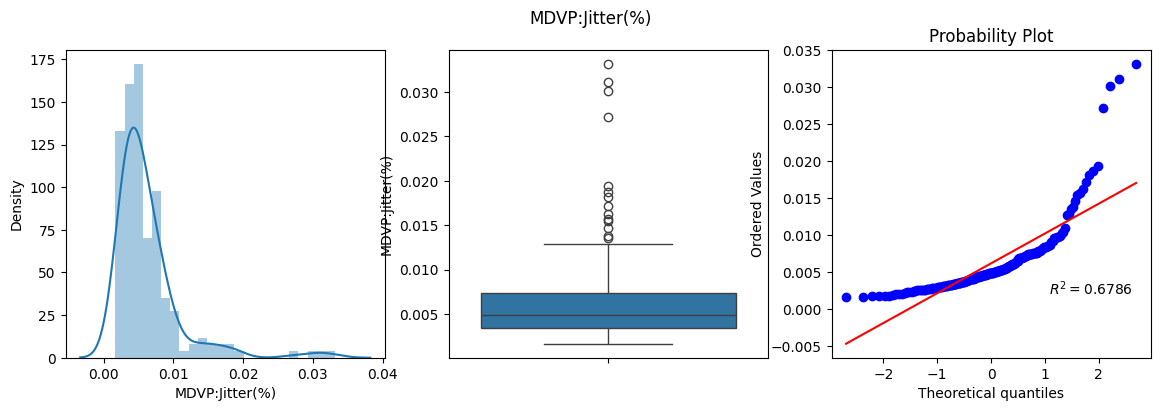

Skewness of MDVP:Jitter(Abs): 2.6490714165257274
Kurtosis of MDVP:Jitter(Abs): 10.869042517763665


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


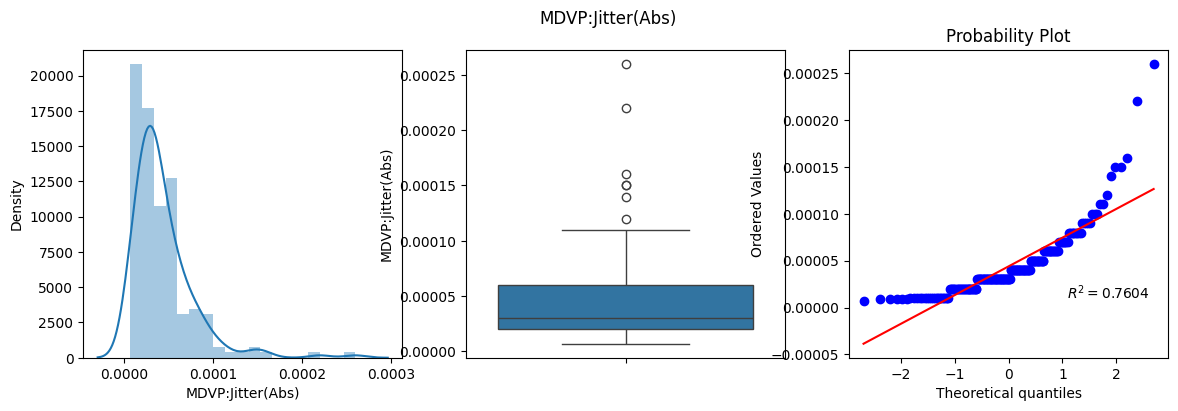

Skewness of MDVP:RAP: 3.3607084504805544
Kurtosis of MDVP:RAP: 14.213797721522422


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


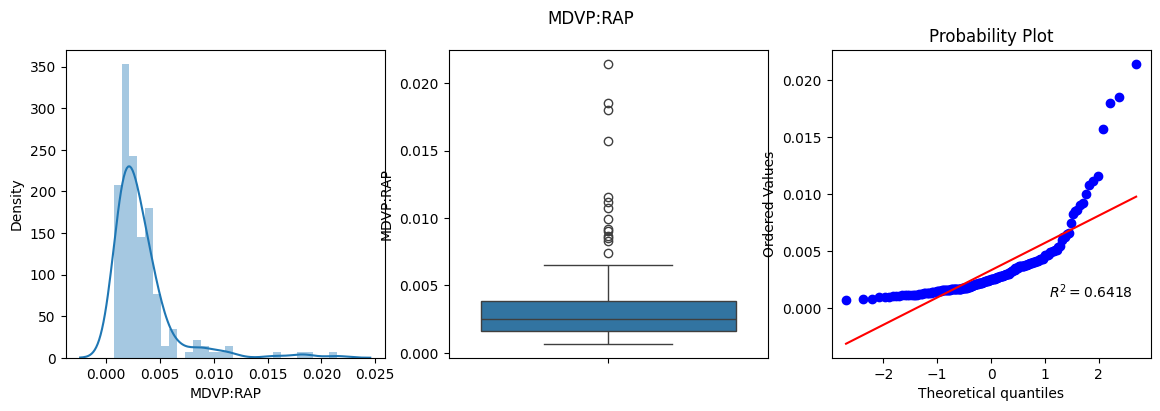

Skewness of MDVP:PPQ: 3.0738924578885167
Kurtosis of MDVP:PPQ: 11.96392212022028


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


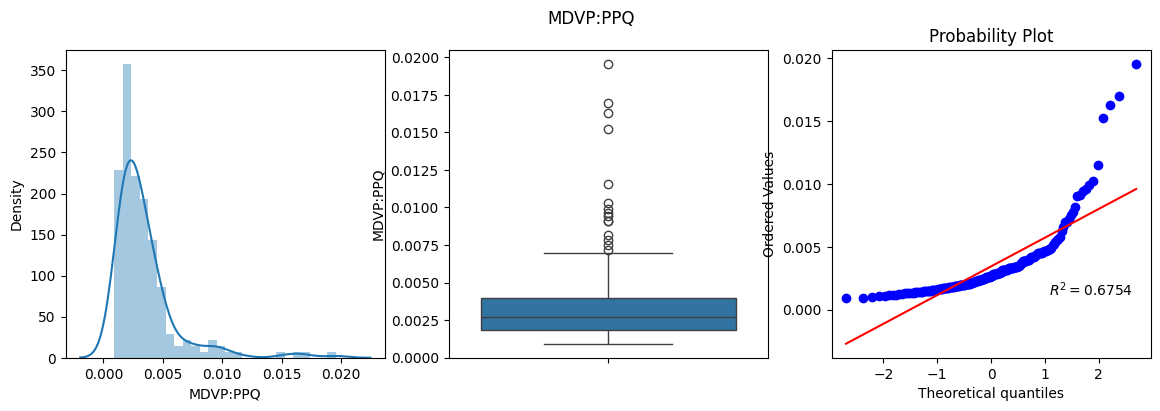

Skewness of Jitter:DDP: 3.36205844788572
Kurtosis of Jitter:DDP: 14.224761911379424


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


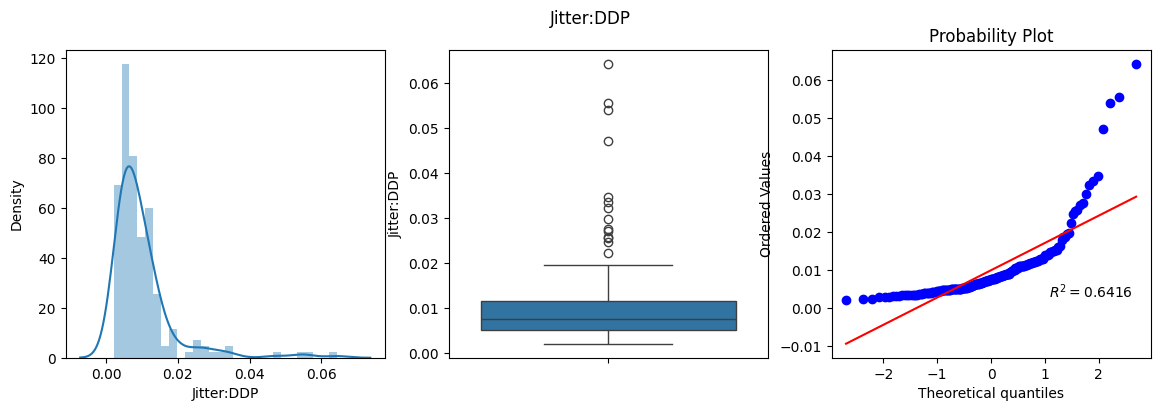

Skewness of MDVP:Shimmer: 1.6664804101559665
Kurtosis of MDVP:Shimmer: 3.238308111100756


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


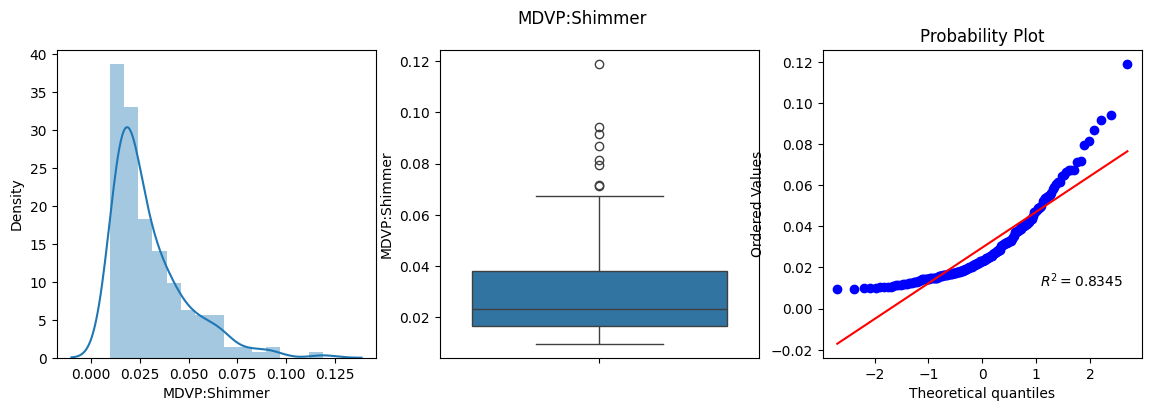

Skewness of MDVP:Shimmer(dB): 1.999388639086127
Kurtosis of MDVP:Shimmer(dB): 5.128192509867997


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


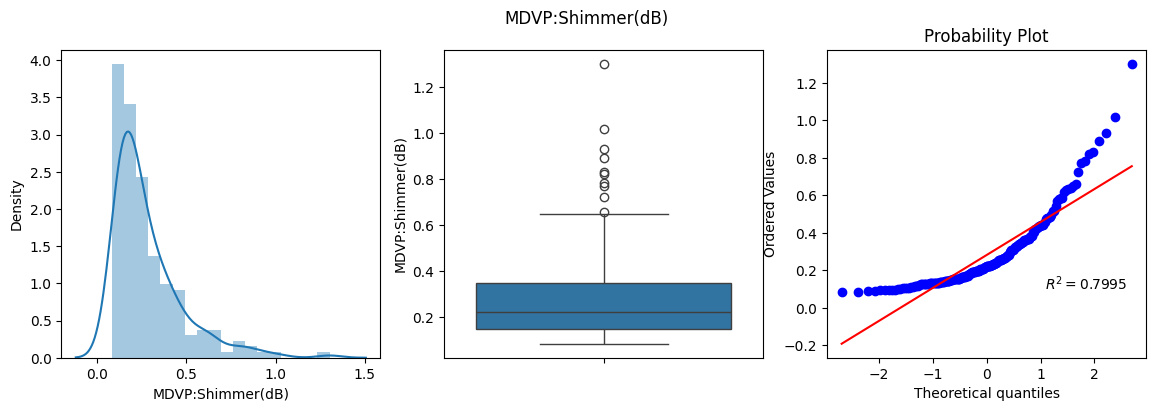

Skewness of Shimmer:APQ3: 1.5805763798815669
Kurtosis of Shimmer:APQ3: 2.720151639596069


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


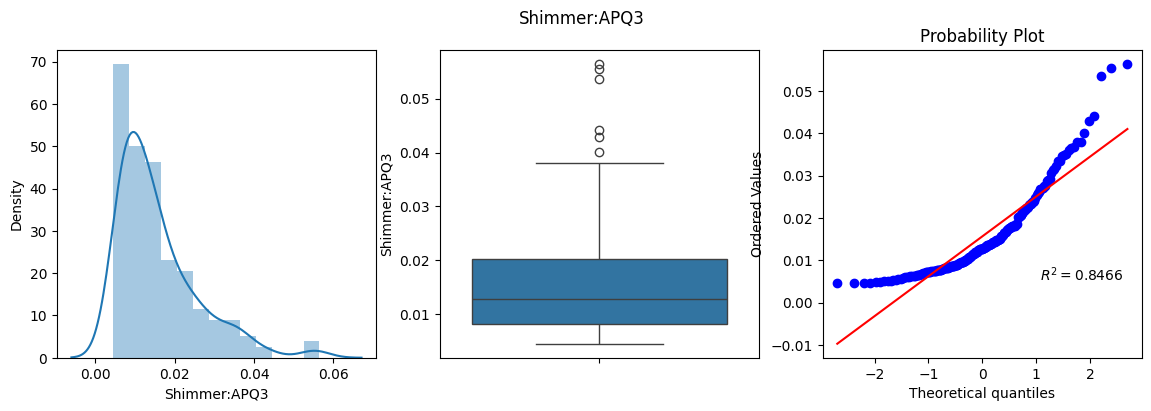

Skewness of Shimmer:APQ5: 1.7986970665376225
Kurtosis of Shimmer:APQ5: 3.8742096517587283


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


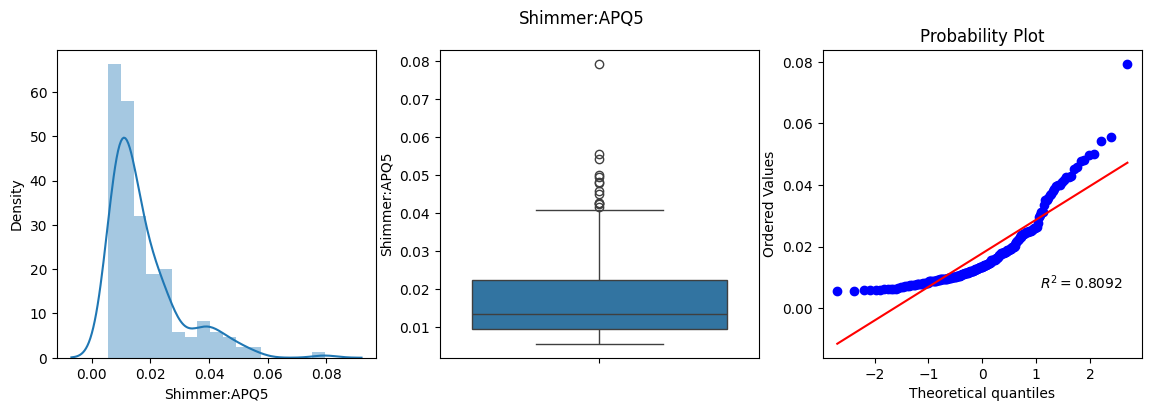

Skewness of MDVP:APQ: 2.6180465022154227
Kurtosis of MDVP:APQ: 11.163288378025513


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


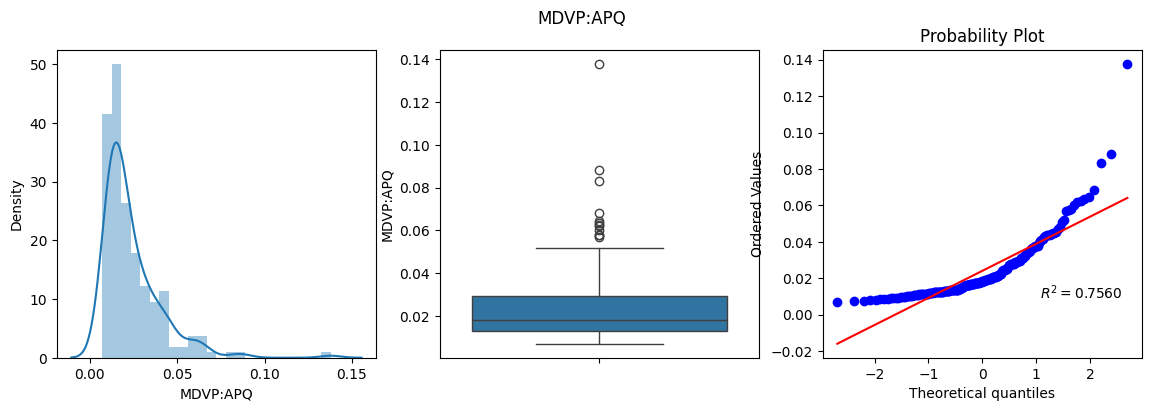

Skewness of Shimmer:DDA: 1.5806179936782254
Kurtosis of Shimmer:DDA: 2.7206613444982173


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


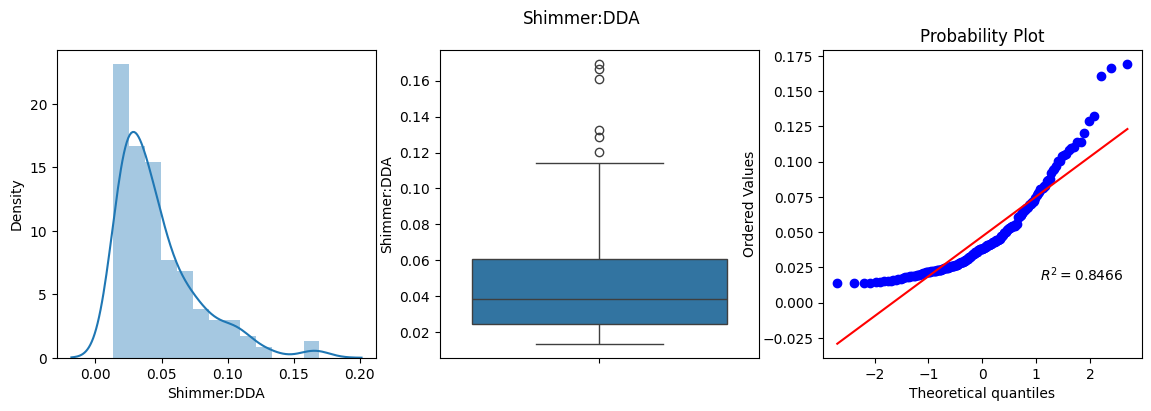

Skewness of NHR: 4.2207091291390615
Kurtosis of NHR: 21.99497411498493


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


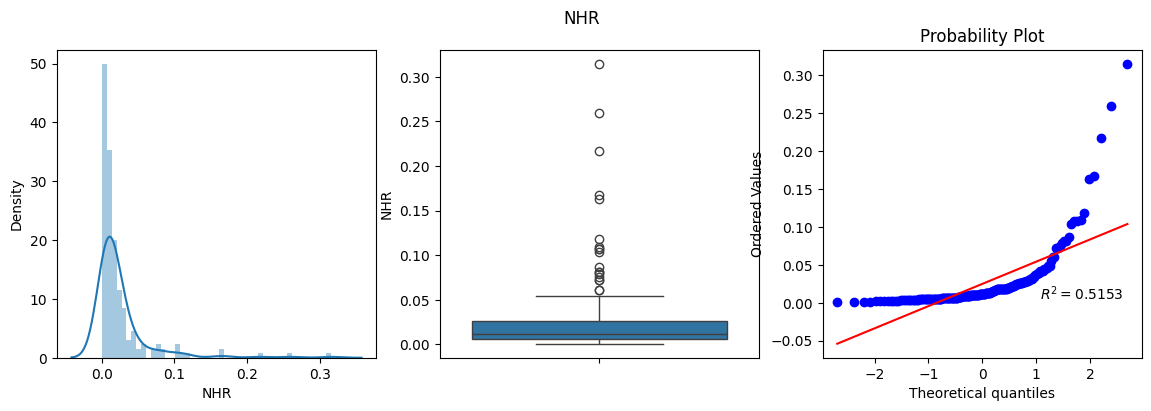

Skewness of HNR: -0.5143174975652068
Kurtosis of HNR: 0.6160358344019841


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


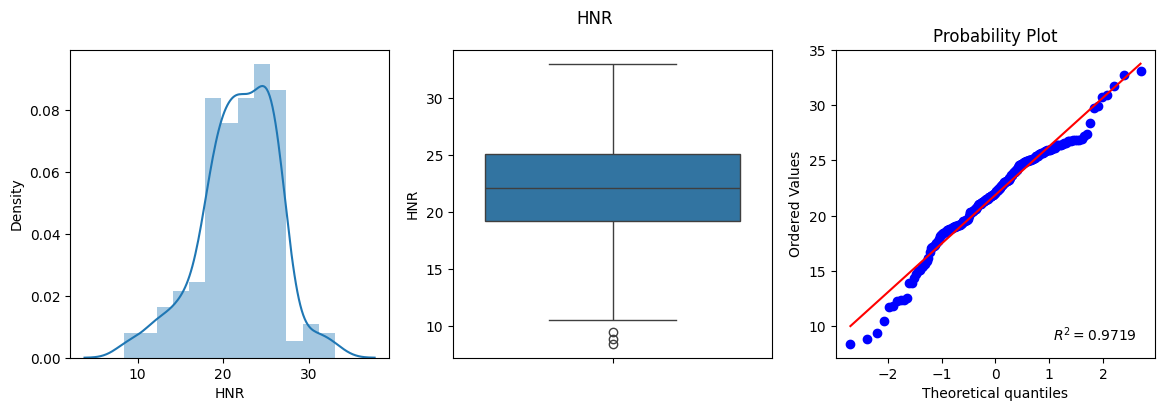

Skewness of status: -1.1877273855919208
Kurtosis of status: -0.5955175949913647


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


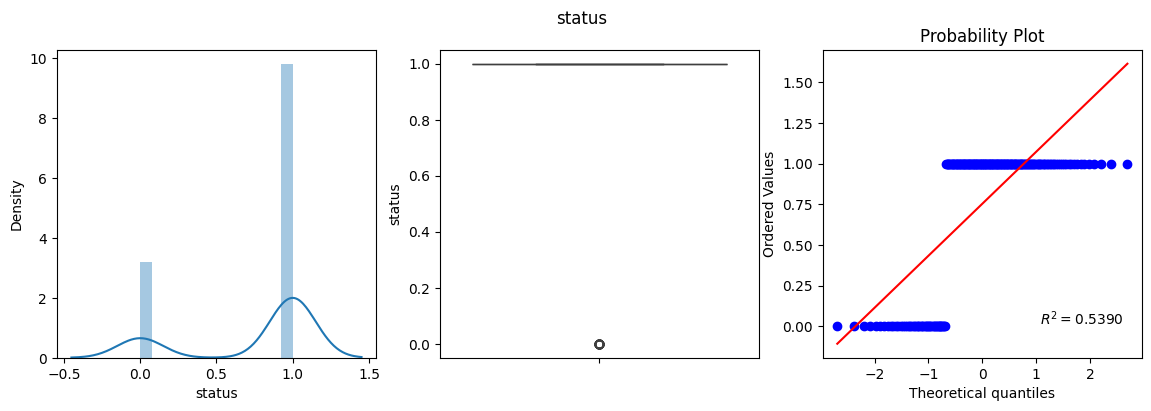

Skewness of RPDE: -0.14340241379821705
Kurtosis of RPDE: -0.9217809777573232


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


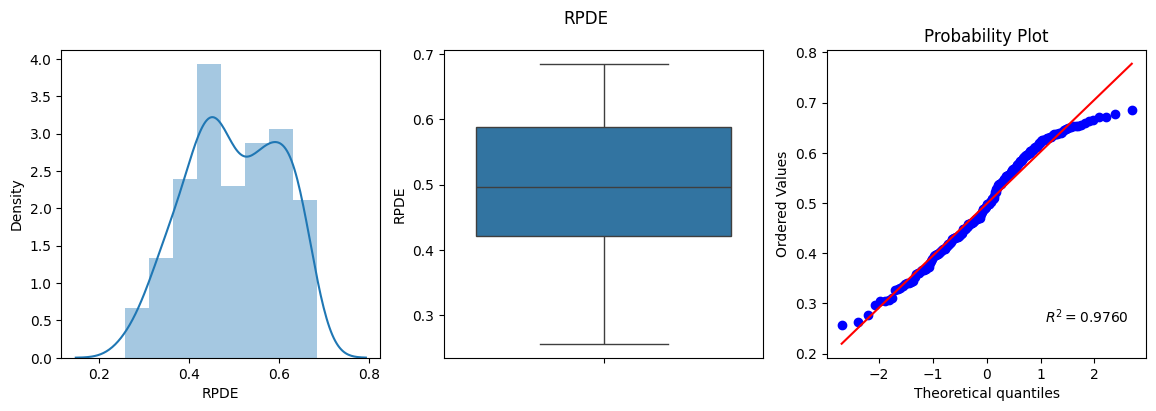

Skewness of DFA: -0.03321366071383457
Kurtosis of DFA: -0.6861518492559338


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


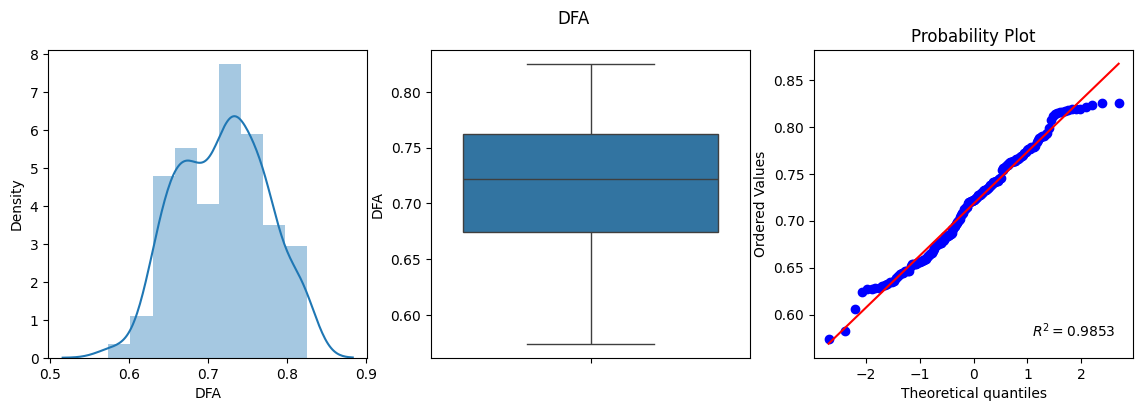

Skewness of spread1: 0.4321389320131794
Kurtosis of spread1: -0.05019918161280712


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


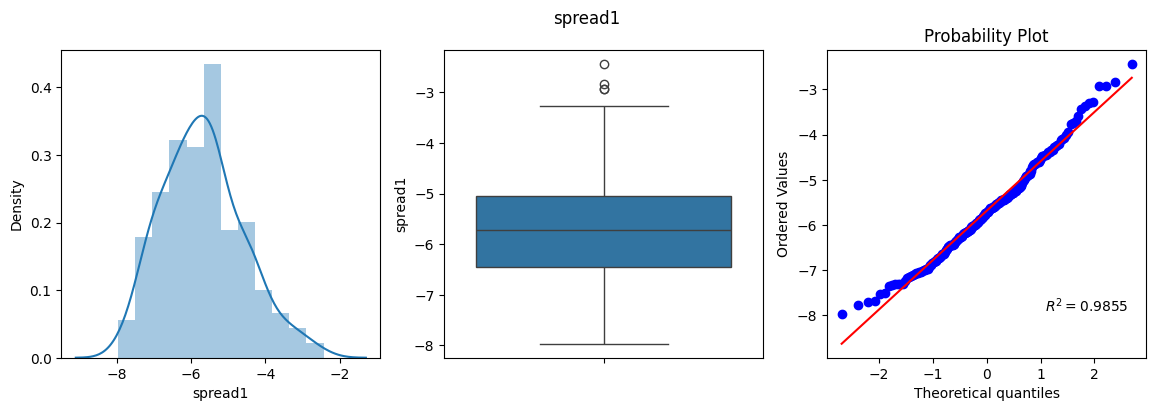

Skewness of spread2: 0.1444304854927841
Kurtosis of spread2: -0.08302289327680024


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


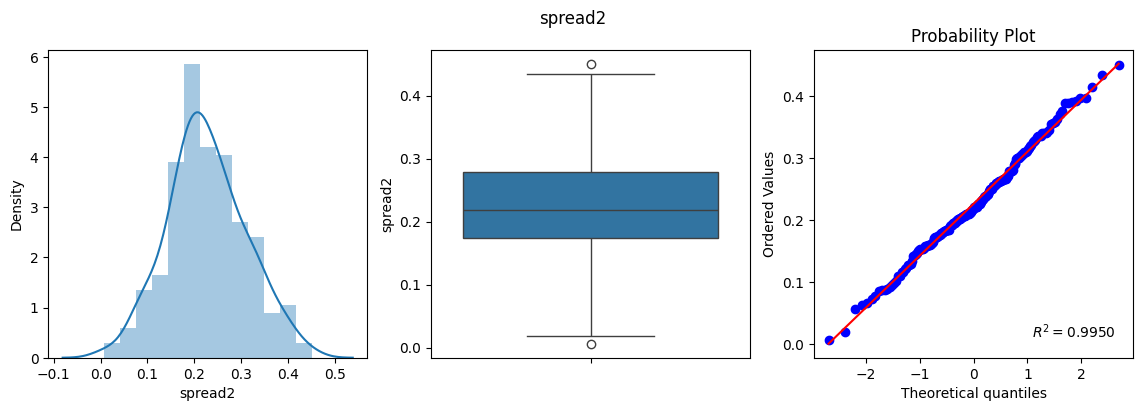

Skewness of D2: 0.4303838913329285
Kurtosis of D2: 0.22033410480833515


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


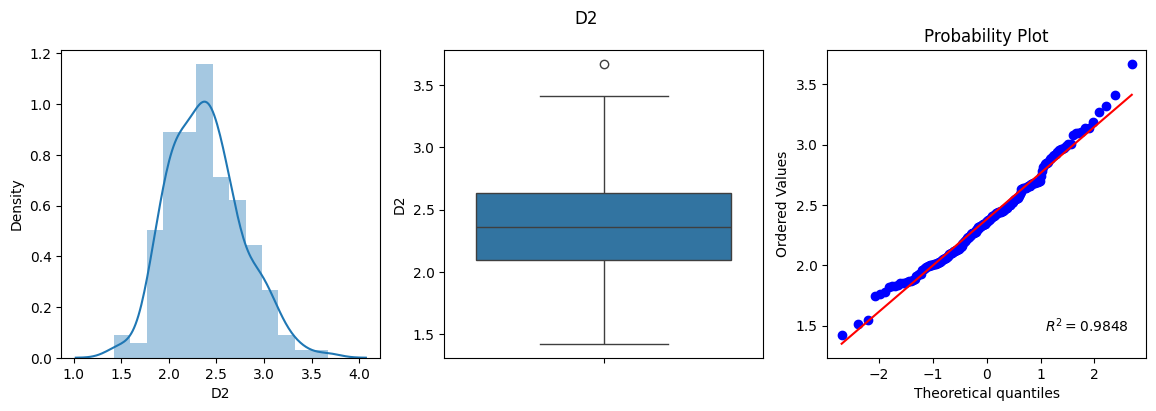

Skewness of PPE: 0.7974910716463577
Kurtosis of PPE: 0.5283349472852588


/tmp/ipython-input-1231773827.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


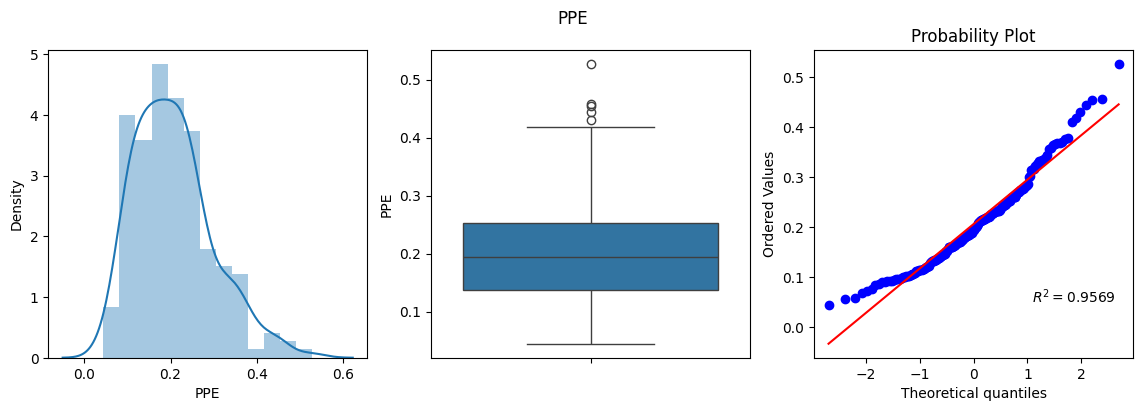

In [10]:
# Plot the distribution of each feature
from scipy.stats import probplot

for col in df.select_dtypes(np.number).columns[:]:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show();

### t-SNE visualization

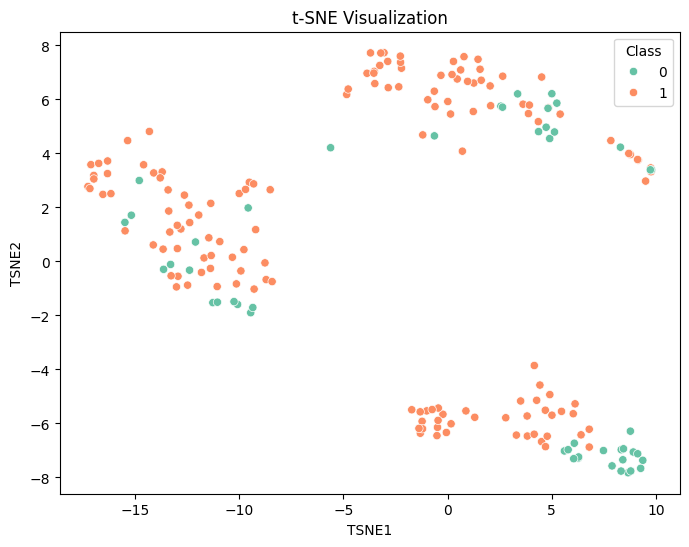

In [11]:
from sklearn.manifold import TSNE

X = df.drop('status',axis = 1)
y = df['status']


# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

### PCA visualization

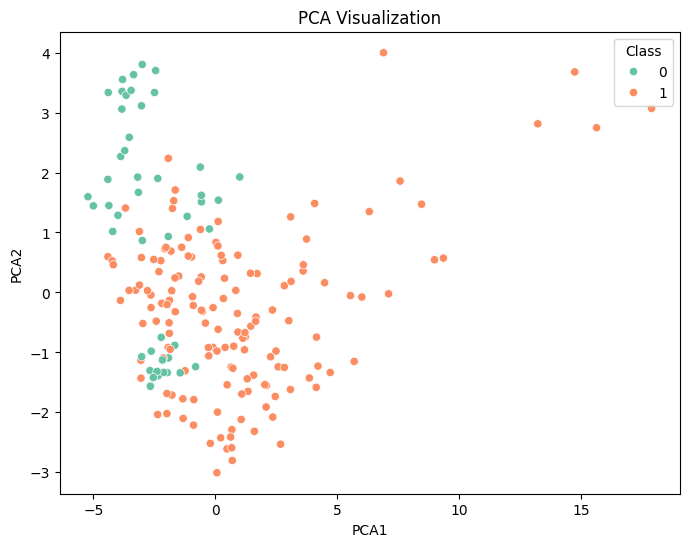

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('status',axis = 1)
y = df['status']

# Standardize the feature matrix
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame with the t-SNE-transformed data and class labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Class', palette='Set2')
plt.title('PCA Visualization')
plt.show()

# Preprocessing

### Missing data

In [20]:
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


No missing values

### Splitting & scaling

In [21]:
# Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create data and target
X = df.drop('status',axis = 1)
y = df['status']


# Initialize scaler
scaler = MinMaxScaler((-1, 1))
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)



X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


# Modelling

### Model evaluation : Scores and confusion matrix

In [22]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid", color_codes=True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def evaluate_model(y_test,y_pred):
  plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

  print("\nClassification Report:\n", classification_report(y_test, y_pred))
  print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

### Non-tree based classifiers

### KNN

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.98      0.98      0.98        46

    accuracy                           0.97        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.97      0.97      0.97        59


Accuracy Score: 0.9661016949152542


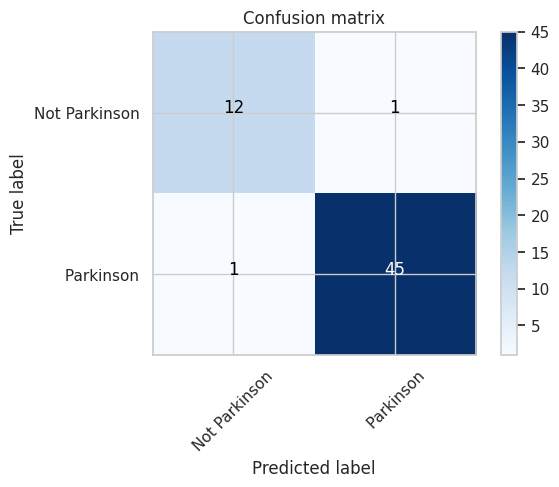

In [23]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
evaluate_model(y_test,y_pred)

### SVM

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.46      0.57        13
           1       0.86      0.96      0.91        46

    accuracy                           0.85        59
   macro avg       0.81      0.71      0.74        59
weighted avg       0.84      0.85      0.83        59


Accuracy Score: 0.847457627118644


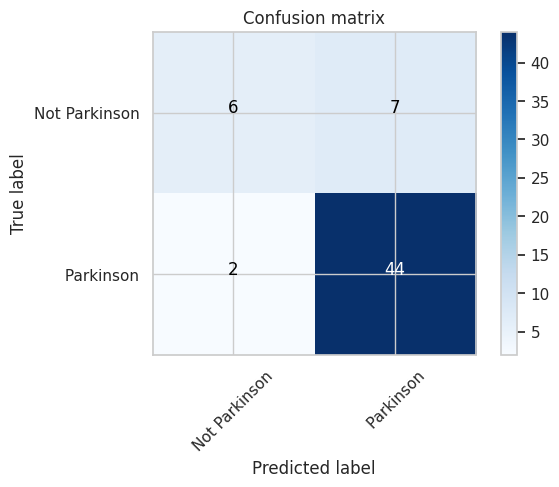

In [24]:
from sklearn.svm import SVC

#linear kernel since dataset has many features
kernel_type = 'linear'

#SVR model
svm_model = SVC(kernel=kernel_type)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set and evaluate
y_pred = svm_model.predict(X_test)
evaluate_model(y_test,y_pred)

### Tree based classifiers

### Simple Decision Tree

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.87      0.89      0.88        46

    accuracy                           0.81        59
   macro avg       0.73      0.71      0.72        59
weighted avg       0.81      0.81      0.81        59


Accuracy Score: 0.8135593220338984


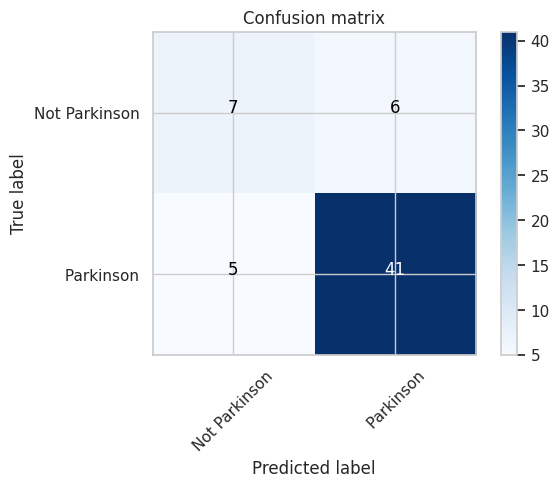

In [25]:
# Simple Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Fitting
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Evaluating
y_pred = decision_tree.predict(X_test)
evaluate_model(y_test,y_pred)

Examine hyperparameters

In [26]:
# Get the hyperparameters
hyperparameters = decision_tree.get_params()

# Print the hyperparameters
print("Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Hyperparameters:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best


Visualize decision tree

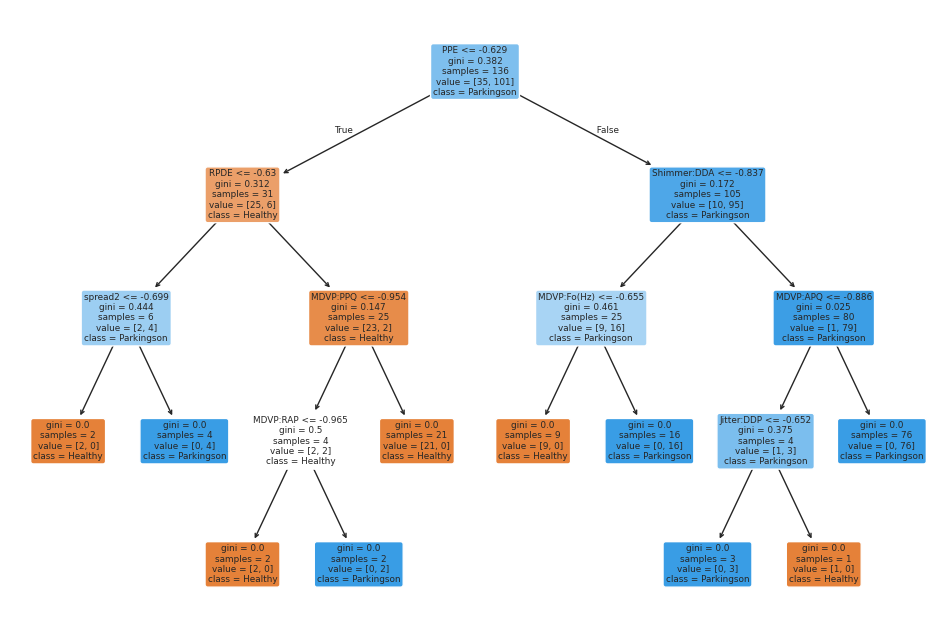

In [27]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=['Healthy','Parkingson'], filled=True, rounded=True)
plt.show()

Optimization using gridsearch

Best hyperparameters:
criterion: entropy
max_depth: 5
max_features: None
min_samples_leaf: 4
min_samples_split: 5
Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.90      0.93      0.91        46

    accuracy                           0.86        59
   macro avg       0.81      0.78      0.79        59
weighted avg       0.86      0.86      0.86        59


Accuracy Score: 0.864406779661017


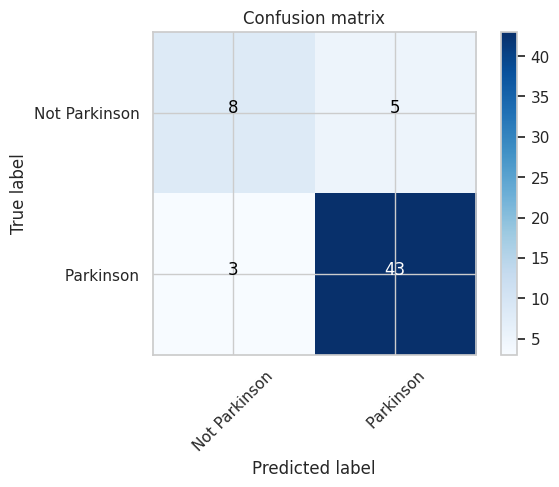

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [ 'sqrt', 'log2', None],
    }

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the hyperparameters
print("Best hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_model = grid_search.best_estimator_

# Evaluating
y_pred = best_model.predict(X_test)
evaluate_model(y_test,y_pred)

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.90      0.93      0.91        46

    accuracy                           0.86        59
   macro avg       0.81      0.78      0.79        59
weighted avg       0.86      0.86      0.86        59


Accuracy Score: 0.864406779661017


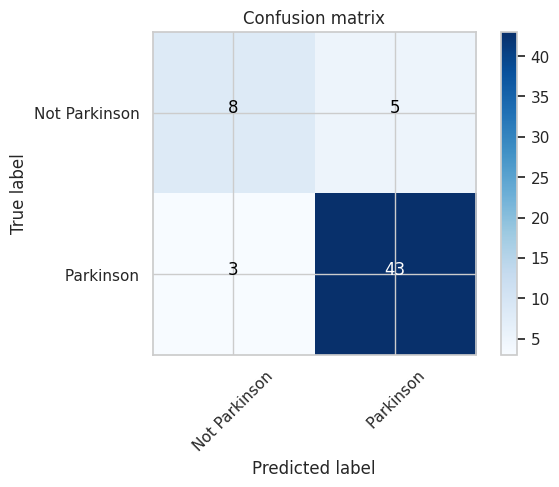

In [29]:
best_model = grid_search.best_estimator_

# Evaluating
y_pred = best_model.predict(X_test)
evaluate_model(y_test,y_pred)

In [30]:
decision_tree = best_model

### Random Forest

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.91      0.93      0.92        46

    accuracy                           0.88        59
   macro avg       0.83      0.81      0.82        59
weighted avg       0.88      0.88      0.88        59


Accuracy Score: 0.8813559322033898


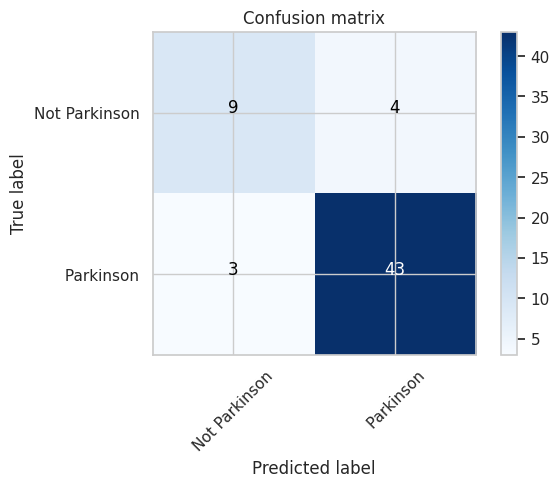

In [31]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Model Definition
rfc_model = RandomForestClassifier(
    n_estimators = 200,
    random_state = 42 )

# Fitting the model
rfc_model.fit(X_train, y_train)

# Prediction and accuracy score
y_pred = rfc_model.predict(X_test)
evaluate_model(y_test,y_pred)

### XGBoost

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.90      0.96      0.93        46

    accuracy                           0.88        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.88      0.88      0.88        59


Accuracy Score: 0.8813559322033898


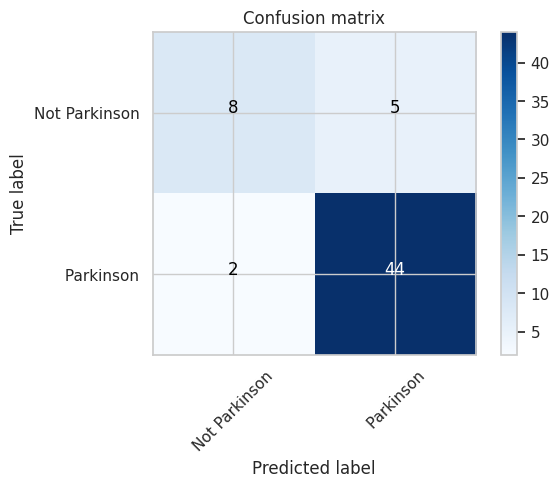

In [32]:
# XGBoost classifier
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred)

Hyperparameters optimization

In [33]:
# Get the hyperparameters of the XGBoost model
hyperparameters = xgb_model.get_params()

# Display the hyperparameters
print("XGBoost Model Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

XGBoost Model Hyperparameters:
objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
feature_weights: None
gamma: None
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: None
max_leaves: None
min_child_weight: None
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: None
n_jobs: None
num_parallel_tree: None
random_state: 42
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: None
tree_method: None
validate_parameters: None
verbosity: None


In [34]:
from sklearn.model_selection import GridSearchCV
import warnings
import joblib
warnings.filterwarnings("ignore", category=UserWarning)

# Check if the saved GridSearchCV object exists
try:
    grid_search = joblib.load('grid_search_model.joblib')
    print("Loaded GridSearchCV object from file.")
except FileNotFoundError:
    # If the file is not found, perform the grid search
    print("GridSearchCV object not found. Performing grid search...")

    # Assuming xgb_model and X_train, y_train are defined earlier in your script
    param_grid = {
        'learning_rate': [0.1, 0.01, 0.001, None],
        'max_depth': [None, 5, 7, 10],
        'n_estimators': [100, 110, 120, None],
        'subsample': [None],
        'colsample_bytree': [None],
        'criterion': ['gini', 'entropy'],
        'max_features': [10, None],
        'min_samples_leaf': [4, None],
        'min_samples_split': [5, None],
    }

    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Save the entire GridSearchCV object, including the best estimator and results
    joblib.dump(grid_search, 'grid_search_model.joblib')

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_params = grid_search.best_params_


GridSearchCV object not found. Performing grid search...
Best set of hyperparameters:  {'colsample_bytree': None, 'criterion': 'gini', 'learning_rate': 0.1, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': None}
Best score:  0.9044973544973545


Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.90      0.98      0.94        46

    accuracy                           0.90        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.90      0.90      0.89        59


Accuracy Score: 0.8983050847457628


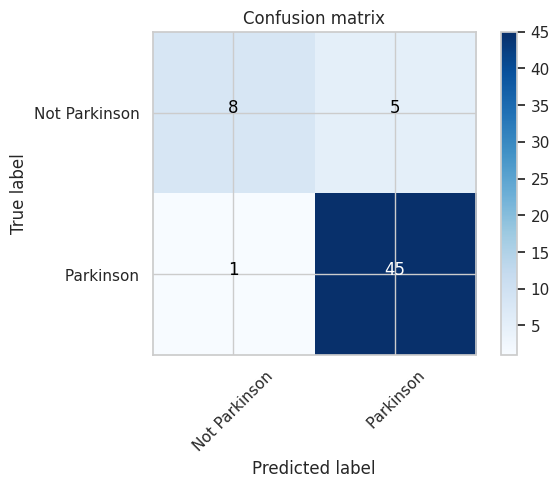

In [35]:
# XGBoost classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

# Save the model to a file using joblib
#joblib.dump(xgb_model, 'my_model.joblib')

y_pred = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred)

### Adaboost

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.93      0.91      0.92        47

    accuracy                           0.88        59
   macro avg       0.81      0.83      0.82        59
weighted avg       0.89      0.88      0.88        59


Accuracy Score: 0.8813559322033898


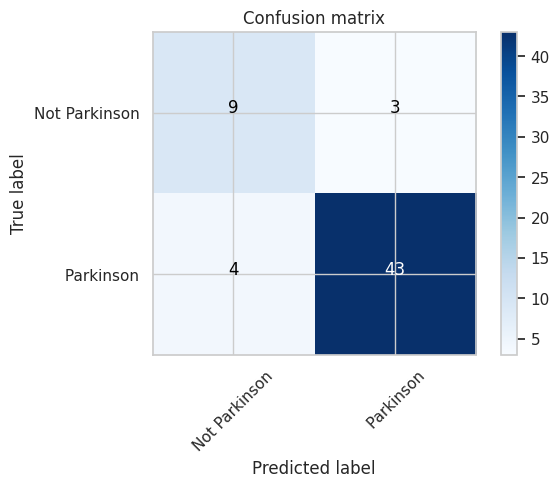

In [36]:
# Ada Boost classifier
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50)
adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)
evaluate_model(y_pred,y_test)

###Bagging

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.89      0.91      0.90        45

    accuracy                           0.85        59
   macro avg       0.79      0.78      0.78        59
weighted avg       0.84      0.85      0.85        59


Accuracy Score: 0.847457627118644


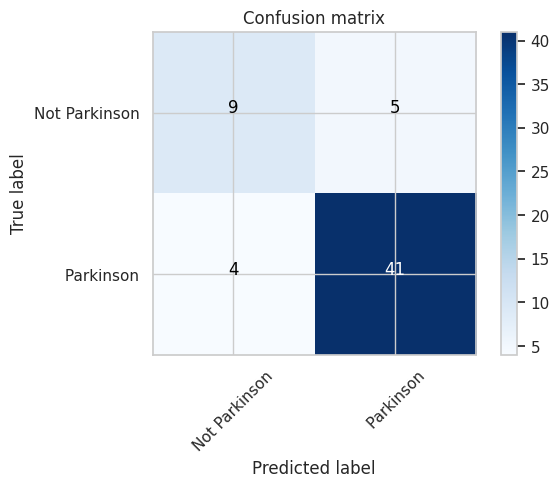

In [37]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier

# Defining the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Defining the model and its hyperparameters
bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100,
    random_state=42
)

# Fitting the model
bagging_model.fit(X_train, y_train)

# Prediction and accuracy score
y_pred_bagging = bagging_model.predict(X_test)
evaluate_model(y_pred_bagging, y_test)

# Evaluating and validating the models

In [38]:
# Pre-trained classifiers
classifiers = [
    ('KNN', knn),
    ('Simple Decision Tree',decision_tree),
    ('Adaboost', adaboost_classifier),
    ('XGBoosting',xgb_model),
    ('SVM', svm_model),
    ('Random Forest', rfc_model),
    ('Bagging', bagging_model)
    # Add additional models here
]


## Compare acc, precision, recall and f1

In [39]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from tabulate import tabulate

def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []

    for model_name, model in models:
        # Fit the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        precision = precision_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store the results
        results.append([model_name, precision, recall, accuracy, f1])

    # Calculate the average scores across models
    avg_scores = np.mean(np.array(results)[:, 1:].astype(float), axis=0)
    avg_scores = ["Average"] + avg_scores.tolist()

    # Add the average scores as the last row
    results.append(avg_scores)

    # Print the results in a table
    headers = ["Model", "Precision", "Recall", "Accuracy", "F1 Score"]
    print(tabulate(results, headers=headers, tablefmt="grid"))


# Call the function to evaluate the models
evaluate_models(classifiers, X_train, y_train, X_test, y_test)


+----------------------+-------------+----------+------------+------------+
| Model                |   Precision |   Recall |   Accuracy |   F1 Score |
+======================+=============+==========+============+============+
| KNN                  |    0.966102 | 0.966102 |   0.966102 |   0.966102 |
+----------------------+-------------+----------+------------+------------+
| Simple Decision Tree |    0.858693 | 0.864407 |   0.864407 |   0.8602   |
+----------------------+-------------+----------+------------+------------+
| Adaboost             |    0.878561 | 0.881356 |   0.881356 |   0.879621 |
+----------------------+-------------+----------+------------+------------+
| XGBoosting           |    0.897552 | 0.898305 |   0.898305 |   0.891179 |
+----------------------+-------------+----------+------------+------------+
| SVM                  |    0.837903 | 0.847458 |   0.847458 |   0.833229 |
+----------------------+-------------+----------+------------+------------+
| Random For

## Plotting precision-recall curves

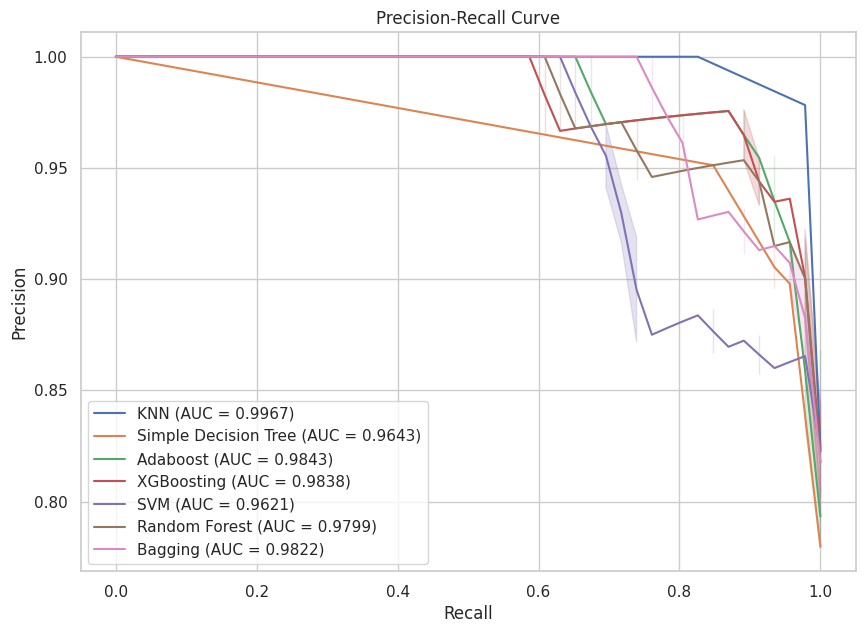

In [40]:
from sklearn.metrics import precision_recall_curve, auc

# Set seaborn style
sns.set(style="whitegrid")

# Plot Precision-Recall curves for each classifier
plt.figure(figsize=(10, 7))


for name, classifier in classifiers:
    # Predict probabilities on the test set
    if hasattr(classifier, "predict_proba"):
        y_prob = classifier.predict_proba(X_test)[:, 1]
    else:
        # For KNN, use decision function for probability estimate
        y_prob = classifier.decision_function(X_test)

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Compute area under the curve (AUC)
    auc_score = auc(recall, precision)

    # Plot the precision-recall curve using seaborn
    label = f'{name} (AUC = {auc_score:.4f})'

    # Create a DataFrame for seaborn
    pr_curve_data = {"Recall": recall, "Precision": precision}
    pr_curve_df = pd.DataFrame(pr_curve_data)

    # Plot the precision-recall curve using seaborn
    sns.lineplot(x="Recall", y="Precision", data=pr_curve_df, label=label)

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Cross-validate all the models

In [41]:
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

def cross_validate_models(models, X, y, k=3):
    results = []

    for model_name, model in models:
        # Perform k-fold cross-validation
        cross_val_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

        # Calculate average accuracy
        average_accuracy = np.mean(cross_val_scores)

        # Store the results
        result_row = [model_name] + cross_val_scores.tolist() + [average_accuracy]
        results.append(result_row)

    # Print the results in a table
    headers = ["Model"] + [f"Fold {i+1}" for i in range(k)] + ["Average cross-validation score"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

# Call the function to perform cross-validation on the models
cross_validate_models(classifiers, X, y, k=6)

+----------------------+----------+----------+----------+----------+----------+----------+----------------------------------+
| Model                |   Fold 1 |   Fold 2 |   Fold 3 |   Fold 4 |   Fold 5 |   Fold 6 |   Average cross-validation score |
+======================+==========+==========+==========+==========+==========+==========+==================================+
| KNN                  | 0.757576 | 0.848485 | 0.909091 |  0.9375  |  0.65625 |  0.5625  |                         0.778567 |
+----------------------+----------+----------+----------+----------+----------+----------+----------------------------------+
| Simple Decision Tree | 0.787879 | 0.787879 | 0.848485 |  0.78125 |  0.90625 |  0.65625 |                         0.794665 |
+----------------------+----------+----------+----------+----------+----------+----------+----------------------------------+
| Adaboost             | 0.787879 | 0.848485 | 0.939394 |  0.75    |  0.75    |  0.8125  |                         0.8

## Learning curves

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1640, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

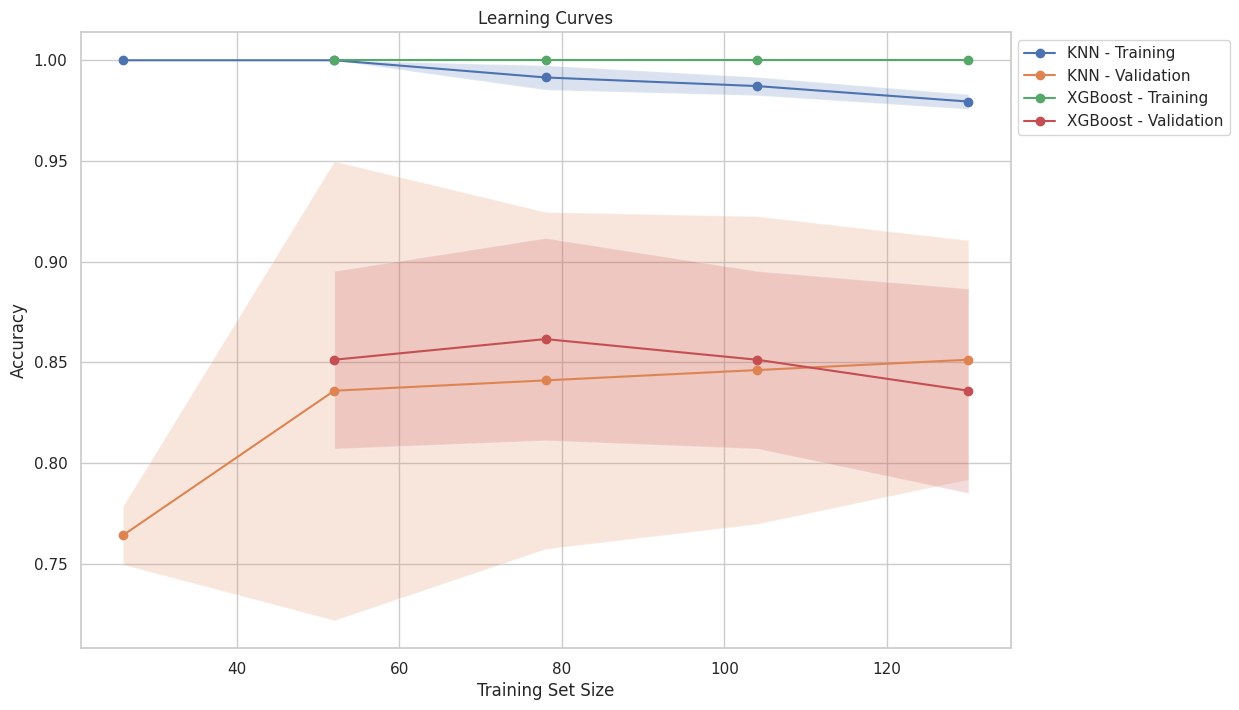

In [42]:

from sklearn.model_selection import learning_curve


def plot_learning_curves(models, X, y, train_sizes, cv=3):
    plt.figure(figsize=(12, 8))

    for model_name, model in models:
        # Generate learning curves
        train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, scoring='accuracy', train_sizes=train_sizes)

        # Calculate mean and standard deviation of scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Plot learning curves
        plt.plot(train_sizes, train_mean, label=f"{model_name} - Training", marker='o')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
        plt.plot(train_sizes, val_mean, label=f"{model_name} - Validation", marker='o')
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

    # Add labels and legend
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Specify the train_sizes and cv
train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
cv = 3

# Call the function to plot learning curves for the models
plot_learning_curves([('KNN',knn),('XGBoost',xgb_model)], X, y, train_sizes, cv)

# Results and tests

### Feature selections

Using the mutual information gain method

In [43]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)

n = 10 # Number of features
features = list(mutual_info.index[:n])

print('Scores without feature selection\n')
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
# Call the function to evaluate the models
evaluate_models(classifiers, X_train, y_train, X_test, y_test)

print("\n\n*---------------------------------------*\n\n")

print(f'Scores with only {n} best feature using information gain method\n')
X_train_gain, X_test_gain, y_train_gain, y_test_gain = train_test_split(X[features], y, test_size=0.3, random_state=11)
# Call the function to evaluate the models
evaluate_models(classifiers, X_train_gain, y_train_gain, X_test_gain, y_test_gain)

Scores without feature selection

+----------------------+-------------+----------+------------+------------+
| Model                |   Precision |   Recall |   Accuracy |   F1 Score |
+======================+=============+==========+============+============+
| KNN                  |    1        | 1        |   1        |   1        |
+----------------------+-------------+----------+------------+------------+
| Simple Decision Tree |    0.909248 | 0.881356 |   0.881356 |   0.888251 |
+----------------------+-------------+----------+------------+------------+
| Adaboost             |    0.898305 | 0.898305 |   0.898305 |   0.898305 |
+----------------------+-------------+----------+------------+------------+
| XGBoosting           |    0.918429 | 0.915254 |   0.915254 |   0.916494 |
+----------------------+-------------+----------+------------+------------+
| SVM                  |    0.852503 | 0.847458 |   0.847458 |   0.849688 |
+----------------------+-------------+----------+-----

### Testing oversampling & Bootstrapping

### Oversampling the data

In [44]:
# Oversampling  the data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1111)
X_train_RUS, y_train_RUS = smote.fit_resample(X_train, y_train)


print(f'Before oversampling : \n{y_train.value_counts()}\n')
print(f'After oversampling : \n{y_train_RUS.value_counts()}')
print('\n')

print('Scores without oversampling\n')
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
# Call the function to evaluate the models
evaluate_models(classifiers, X_train, y_train, X_test, y_test)

print("\n\n*---------------------------------------*\n\n")

print('Scores with oversampling\n')
# Call the function to evaluate the models
evaluate_models(classifiers, X_train_RUS, y_train_RUS, X_test, y_test)



Before oversampling : 
status
1    100
0     36
Name: count, dtype: int64

After oversampling : 
status
1    100
0    100
Name: count, dtype: int64


Scores without oversampling

+----------------------+-------------+----------+------------+------------+
| Model                |   Precision |   Recall |   Accuracy |   F1 Score |
+======================+=============+==========+============+============+
| KNN                  |    1        | 1        |   1        |   1        |
+----------------------+-------------+----------+------------+------------+
| Simple Decision Tree |    0.894447 | 0.847458 |   0.847458 |   0.858543 |
+----------------------+-------------+----------+------------+------------+
| Adaboost             |    0.898305 | 0.898305 |   0.898305 |   0.898305 |
+----------------------+-------------+----------+------------+------------+
| XGBoosting           |    0.918429 | 0.915254 |   0.915254 |   0.916494 |
+----------------------+-------------+----------+------------

### Outliers search with Isolation tree

In [45]:
# Outlier search
from sklearn.ensemble import IsolationForest

# Extract features (excluding 'status')
#features = df.drop('status', axis=1)

# Step 2: Apply Isolation Tree Preprocessing to Features # default = 0.10, 0.05 by chat, 'auto' available,
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(X)
predictions = isolation_forest.predict(X)

# Filter out outliers (considering only inliers for training)
outliers_mask = (predictions == 1)


X_train_out, _, y_train_out, _ = train_test_split(X[outliers_mask], y[outliers_mask], test_size=0.3, random_state=11)

print('Scores with outliers\n')
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
# Call the function to evaluate the models
evaluate_models(classifiers, X_train, y_train, X_test, y_test)

print("\n\n*---------------------------------------*\n\n")

print('Scores without outliers\n')
# Call the function to evaluate the models
evaluate_models(classifiers, X_train_out, y_train_out, X_test, y_test)

Scores with outliers

+----------------------+-------------+----------+------------+------------+
| Model                |   Precision |   Recall |   Accuracy |   F1 Score |
+======================+=============+==========+============+============+
| KNN                  |    1        | 1        |   1        |   1        |
+----------------------+-------------+----------+------------+------------+
| Simple Decision Tree |    0.894447 | 0.847458 |   0.847458 |   0.858543 |
+----------------------+-------------+----------+------------+------------+
| Adaboost             |    0.898305 | 0.898305 |   0.898305 |   0.898305 |
+----------------------+-------------+----------+------------+------------+
| XGBoosting           |    0.918429 | 0.915254 |   0.915254 |   0.916494 |
+----------------------+-------------+----------+------------+------------+
| SVM                  |    0.852503 | 0.847458 |   0.847458 |   0.849688 |
+----------------------+-------------+----------+------------+----

### Bootstrapping the data

In [46]:
# Set the number of bootstrap samples you want to generate (usually 1000 to 5000)
num_bootstrap_samples = 2
# Set the bootstrap sample size (63% of the total sample)
bootstrap_sample_size = int(0.63 * len(df))

# Create an empty list to store bootstrap samples
bootstrap_samples = []

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Sample with replacement from the original DataFrame
    bootstrap_sample = df.sample(n=bootstrap_sample_size, replace=True)
    bootstrap_samples.append(bootstrap_sample)

# Concatenate the bootstrap samples into a single DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)


# Create data and target
X_m = bootstrap_df.drop(['status'],axis = 1)
y_m = bootstrap_df['status']


# Initialize scaler
scaler = MinMaxScaler((-1, 1))
X_m = pd.DataFrame(scaler.fit_transform(X_m),columns = X_m.columns)

# Split the data into train and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=11)

print('Scores without bootstraping\n')
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
# Call the function to evaluate the models
evaluate_models(classifiers, X_train, y_train, X_test, y_test)

print("\n\n*---------------------------------------*\n\n")

print('Scores with bootstraping\n')
# Call the function to evaluate the models
evaluate_models(classifiers, X_train_m, y_train_m, X_test_m, y_test_m)

Scores without bootstraping

+----------------------+-------------+----------+------------+------------+
| Model                |   Precision |   Recall |   Accuracy |   F1 Score |
+======================+=============+==========+============+============+
| KNN                  |    1        | 1        |   1        |   1        |
+----------------------+-------------+----------+------------+------------+
| Simple Decision Tree |    0.909248 | 0.881356 |   0.881356 |   0.888251 |
+----------------------+-------------+----------+------------+------------+
| Adaboost             |    0.898305 | 0.898305 |   0.898305 |   0.898305 |
+----------------------+-------------+----------+------------+------------+
| XGBoosting           |    0.918429 | 0.915254 |   0.915254 |   0.916494 |
+----------------------+-------------+----------+------------+------------+
| SVM                  |    0.852503 | 0.847458 |   0.847458 |   0.849688 |
+----------------------+-------------+----------+----------

### Feature engineering

Adding sex data from the original study https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3051371/

In [47]:
df_filtered_name = df

# Sex data (Age also included just in case if needed)
df_sex = {
    'subject_code': ['S01', 'S34', 'S44', 'S20', 'S24', 'S26', 'S08', 'S39', 'S33', 'S32',
                     'S02', 'S22', 'S37', 'S21', 'S04', 'S19', 'S35', 'S05', 'S18', 'S16',
                     'S27', 'S25', 'S06', 'S10', 'S07', 'S13', 'S43', 'S17', 'S42', 'S50', 'S49','S31'],
    'Sex': ['M', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M',
            'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M',
            'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M','M'],
    # 'Age': [78, 79, 67, 70, 73, 53, 48, 64, 68, 50,
    #         60, 60, 76, 81, 70, 73, 85, 72, 61, 62,
    #         72, 74, 63, 46, 48, 61, 62, 64, 66, 66, 69],
}

# Create the DataFrame
df_sex = pd.DataFrame(df_sex)

# Mapping 'M' to 0 and 'F' to 1 in the 'sex' column
df_sex['Sex'] = df_sex['Sex'].map({'M': 0, 'F': 1})

# Add 'name' from the index
df_filtered_name['name'] = df_filtered_name.index

# Extract subject codes from the 'name' column
df_filtered_name['subject_code'] = df_filtered_name['name'].str.extract(r'phon_R01_(S\d{2})_\d+')

# Merge 'df' with 'sex_data' to add the 'sex' column
df_filtered_name = pd.merge(df_filtered_name, df_sex, on='subject_code', how='left')

# # Drop Subject 31 for being sexless
# mask = df_filtered_name['subject_code'] == 'S31'
# df_filtered_name = df_filtered_name[~mask]

# Drop the 'subject_code' and 'name'
df_filtered_name.drop('name', axis=1, inplace=True)
df_filtered_name.drop('subject_code', axis=1, inplace=True)

df_filtered_name

# Create data and target
X_m = df_filtered_name.drop('status',axis = 1)
y_m = df_filtered_name['status']


# Initialize scaler
scaler = MinMaxScaler((-1, 1))
X_m = pd.DataFrame(scaler.fit_transform(X_m),columns = X_m.columns)

# Split the data into train and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=11)

print('Scores without sex data added\n')
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
# Call the function to evaluate the models
evaluate_models(classifiers, X_train, y_train, X_test, y_test)

print("\n\n*---------------------------------------*\n\n")

print('Scores with sex data added\n')
# Call the function to evaluate the models
evaluate_models(classifiers, X_train_m, y_train_m, X_test_m, y_test_m)

Scores without sex data added

+----------------------+-------------+----------+------------+------------+
| Model                |   Precision |   Recall |   Accuracy |   F1 Score |
+======================+=============+==========+============+============+
| KNN                  |    1        | 1        |   1        |   1        |
+----------------------+-------------+----------+------------+------------+
| Simple Decision Tree |    0.901474 | 0.864407 |   0.864407 |   0.873344 |
+----------------------+-------------+----------+------------+------------+
| Adaboost             |    0.898305 | 0.898305 |   0.898305 |   0.898305 |
+----------------------+-------------+----------+------------+------------+
| XGBoosting           |    0.918429 | 0.915254 |   0.915254 |   0.916494 |
+----------------------+-------------+----------+------------+------------+
| SVM                  |    0.852503 | 0.847458 |   0.847458 |   0.849688 |
+----------------------+-------------+----------+--------

# Final classifier : Optimized XGBoost

XGBoost + param optimization + oversampling + outliers remove

Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        47

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59


Accuracy Score: 1.0


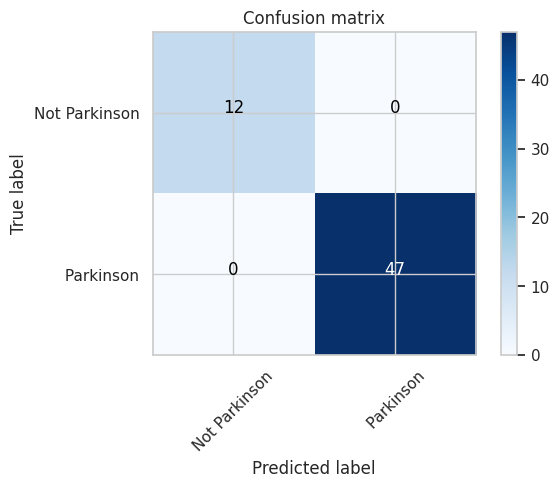

In [48]:
# XGBoost classifier
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
X_train_out, _, y_train_out, _ = train_test_split(X[outliers_mask], y[outliers_mask], test_size=0.3, random_state=11)

smote = SMOTE(random_state = 1111)
X_train_RUS, y_train_RUS = smote.fit_resample(X_train_out, y_train_out)


final_model = XGBClassifier(**best_params)
final_model.fit(X_train_RUS, y_train_RUS)

# Save the model to a file using joblib
joblib.dump(final_model, 'my_model.joblib')

y_pred = final_model.predict(X_test)
evaluate_model(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


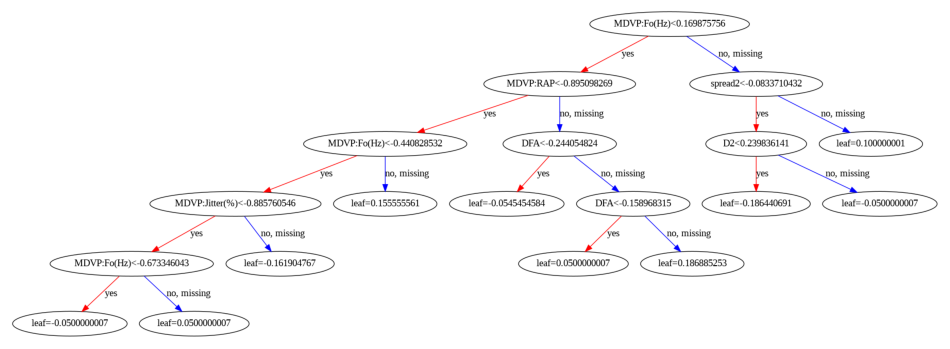

In [49]:
# Visualize one of the trees (e.g., the first tree, index 0)
fig, ax = plt.subplots(figsize=(12, 12))
xgb.plot_tree(final_model, num_trees=0, ax=ax)
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X, y, cv=10)  # 5-fold cross-validation

print("Cross-Validation Scores:")
print(scores)

Cross-Validation Scores:
[0.9        0.95       0.9        0.9        1.         0.94736842
 0.84210526 0.78947368 0.89473684 0.89473684]


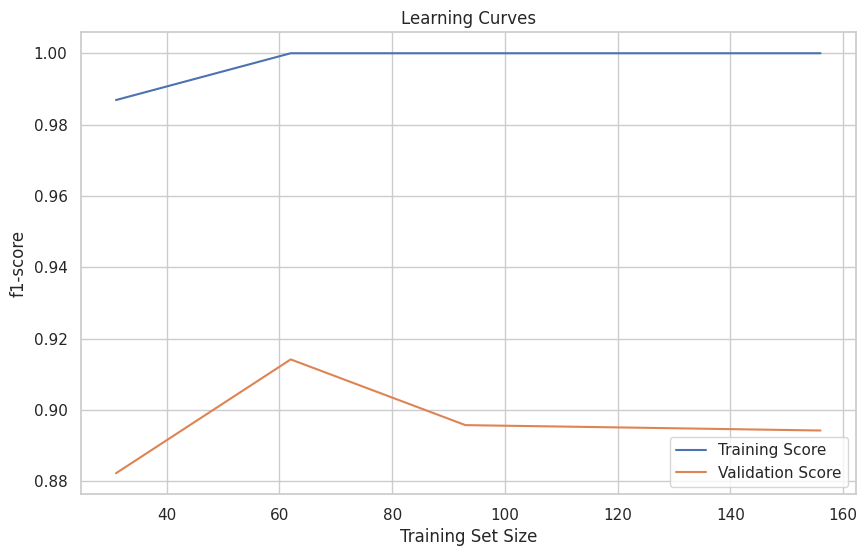

In [51]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(final_model, X, y, cv=5, scoring='f1', train_sizes=[0.2, 0.4, 0.6, 0.8, 1.0])

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('f1-score')
plt.title('Learning Curves')
plt.legend()
plt.show()